In [8]:
from rs_data import get_dataframe, SkillType, evaluate_model

activity = 'Firemaking'
df, formatter = get_dataframe(activity, limit=2500, aggregate=True, skill_type=SkillType.LEVELS)

X = df.drop(columns=['Banned', 'pid'])
y = df['Banned']
df

,pid,Banned,updates,activescrapes,inactivescrapes,shortestinactivity,shortestactivity,longestinactivity,longestactivity,Overall_live,...,Vardorvis_aggregate,Venenatis_aggregate,Vet'ion_aggregate,Vorkath_aggregate,Wintertodt_aggregate,Zalcano_aggregate,Zulrah_aggregate,Colosseum Glory_aggregate,Deadman Points_aggregate,League Points_aggregate
0,170698,False,37,28,9,1,1,6,9,2236452139,...,0.0,8.0,0.0,4115.0,6342.0,251.0,3117.0,0,0,0
1,80833,False,71,67,4,1,3,2,53,601621625,...,0.0,0.0,0.0,0.0,5752.0,0.0,0.0,0,0,0
2,3804178,True,19,4,15,7,1,8,1,171624284,...,0.0,0.0,0.0,0.0,577.0,0.0,0.0,0,0,0
3,682311,True,45,40,5,5,0,5,0,252826786,...,0.0,0.0,0.0,0.0,6254.0,0.0,0.0,0,0,0
4,1096481,False,71,70,1,1,0,1,0,687382853,...,0.0,0.0,0.0,0.0,3588.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,339693,False,57,21,36,1,1,11,11,177086291,...,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0,0,0
2496,105584,False,72,67,5,2,1,3,1,319339186,...,0.0,2.0,0.0,0.0,101.0,0.0,0.0,0,0,0
2497,182610,False,72,65,7,1,1,1,23,216491210,...,0.0,0.0,0.0,84.0,287.0,50.0,0.0,0,0,0
2498,75002,False,72,71,1,1,0,1,0,427903760,...,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0,0,0


In [9]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Sampling 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
# Models

In [10]:
from sklearn.compose import ColumnTransformer

standard_features = formatter.agg_skills + formatter.agg_minigames
robust_features = formatter.extra_features #[]    # Assume these have outliers
minmax_features = formatter.live_skills  #[]  # Assume these need scaling between 0 and 1
minmax_features_2 = formatter.live_minigames #[] 

# Creating the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), standard_features),
        ('robust', RobustScaler(), robust_features),
        ('minmax', MinMaxScaler(), minmax_features),
        ('minmax_2', MinMaxScaler(), minmax_features_2),
        
    ])

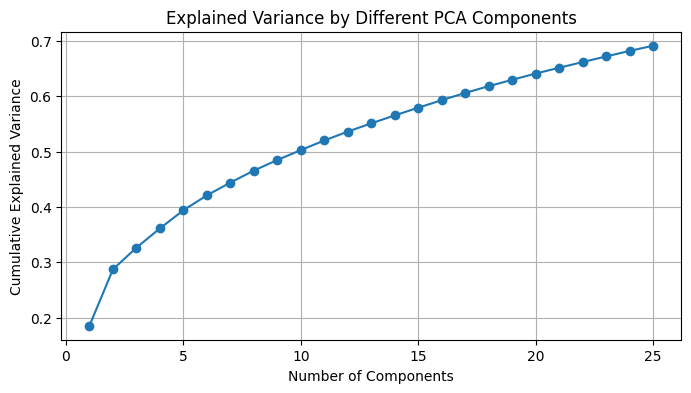

ValueError: The plot method requires fitted model and labels.

In [16]:
from imblearn.pipeline import Pipeline as ImblearnPipeline
from rs_data import (PCA, TSNE, UMAP)

# Create an imblearn pipeline with SMOTE
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=25)),
])

pipeline.fit(X, y)
pca = pipeline.named_steps['PCA']
pca.elbow_plot()
pca.plot()

In [ ]:
# Create an imblearn pipeline with SMOTE
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=50)),
])

pipeline.fit(X, y)
pca = pipeline.named_steps['PCA']
pca.elbow_plot()
pca.plot()

In [ ]:
# Create an imblearn pipeline with SMOTE
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=30)),
])

pipeline.fit(X, y)
pca = pipeline.named_steps['PCA']
pca.elbow_plot()
pca.plot()

In [ ]:
# Create an imblearn pipeline with SMOTE
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=15)),
])

pipeline.fit(X, y)
pca = pipeline.named_steps['PCA']
pca.elbow_plot()
pca.plot()